# Week 6: Model Training
# Pre-module

## Introduction to Class Imbalance

This week, as a preliminary exercise, we will delve into an additional aspect of data preprocessing, setting the stage for our focus on training models. In analyzing any for of biological data, you will often come across datasets where one class possesses a lot more samples than the other, especially working with rare diseases. To better understand this concept, let's engage with an illustrative analogy.

<span style="background-color: #AFEEEE">**The Dragon Analogy:**</span> Imagine you're a knight in a mythical land, tasked with a crucial mission: to identify dragons among a vast array of animals. The legend says that acquiring enough dragon scales can grant immortality. However, there's a catch – dragons are incredibly rare, and until recently, no one had ever seen one. Recently, two dragons were captured, providing you with your first real glimpse of these elusive creatures. With this knowledge, you set out on your quest to classify animals as either dragons or not – a classic binary classification problem. But with only two dragons ever seen, how can you be confident in distinguishing dragons from other animals, especially those that are of different phenotypes?

Upon returning from your journey, you need to report your success to the king. One straightforward approach is to tell him the percentage of animals you correctly identified. However, due to the extreme rarity of dragons, if you simply identified every animal as "not a dragon" because you were unsure, you estimate your accuracy would be 99.9% – after all, we know that dragons are exceedingly rare. This sounds impressive, but it misses the entire point of the mission, which is to find that elusive 0.01% – the dragons.


#### The Challenge of Class Imbalance

This scenario illustrates the challenge of <span style="background-color: #AFEEEE">**class imbalance** </span>in machine learning. When one class (dragons) is significantly less represented than the other (non-dragons), traditional accuracy metrics can be misleading. If there is imbalance in the training set (our two dragons) the model can never really learn the different featues that define that class. If there are class imbalances in our test set (our quest for dragons), we can see that maybe accuracy is not the best metric to measure performance. In machine learning, to remedy these issues, this might involve techniques like resampling, using different metrics like precision-recall, or applying specialized algorithms to better handle the imbalance.

When handling data obtained from a biological context, it is often the case that we get an imblanced dataset. Diseases are often rare, so if we have the past few years of chest x-rays from a hospital, it would be highly likely that the majority of these images are of healthy lungs, and only a few are of lungs with pneumonia. In this case, we would call the healthy/control images the <span style="background-color: #AFEEEE">**majority class**</span> and the pneumonia lung images, the <span style="background-color: #AFEEEE">**minority class**</span>.


#### Exploring Our Dataset

Before we explore various techniques to address class imbalance, let's first examine the class distribution within our breast cancer dataset. This analysis will provide a clear understanding of how class imbalance manifests in real-world data, setting the foundation for our subsequent learning.

In [ ]:
#Install these necessary packages
%pip install imbalanced-learn

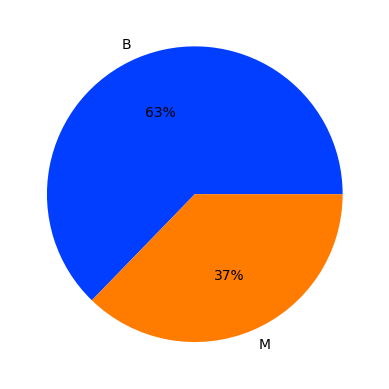

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('bc_data.csv', index_col=0)

B,M = df.diagnosis.value_counts()
plt.pie([B,M], labels = ["B","M"], colors = sns.color_palette('bright')[0:2], autopct='%.0f%%')
plt.show()

So from our analysis, we can see that the benign class is significantly larger than the malignant class; thus, making the malignant class the minority class which makes sense from a clinical perspective.

Handling class imbalance is crucial in training effective machine learning models, especially in binary classification problems, which are frequently tackled using methods like logistic regression. The issue of imbalanced datasets is particularly problematic because it can lead to models that are inherently biased towards the majority class. This bias occurs for several reasons:

<span style="background-color: #AFEEEE">**Learning from Frequency:**</span> Machine learning algorithms often learn by identifying patterns that are most frequent in the dataset. In an imbalanced dataset, the majority class dominates these patterns, leading the model to develop a strong bias towards it. This is because the algorithm has more examples from the majority class to learn from, making it more familiar and thus more likely to predict an instance as belonging to this class.

<span style="background-color: #AFEEEE">**Error Minimization Strategy:**</span> Most standard machine learning algorithms aim to minimize overall error. In a scenario where one class vastly outnumbers the other, the simplest way to achieve low error rates is by favoring the majority class. For instance, in a dataset where 95% of the samples are of the majority class, a model can achieve 95% accuracy by simply predicting every instance as the majority class, completely ignoring the minority class.

### 1. Penalized Models
To start off, we can apply a simple solution to our problem. Penalized models introduce a concept of imposing greater penalties on the model for misclassifying instances of the minority class. This approach is particularly useful when dealing with imbalanced datasets.

Adjusting class weights in logistic regression is a technique that involves modifying the weights assigned to different classes to address class imbalance. In logistic regression, this method is particularly useful as it directly influences the model's learning process. By assigning a higher penalty for misclassifying the minority class, the model is encouraged to pay more attention to these instances. This is achieved by increasing the weight, or importance, of the minority class within the algorithm's cost function. 

The method of adjusting class weights in logistic regression is centered around recalibrating the model's focus to better address the imbalances. By altering the model's objective function, this approach assigns a greater penalty for misclassifying the minority class, thereby shifting the model's attention towards more accurately predicting this class. This recalibration is achieved by modifying the weights assigned to each class, essentially instructing the model to prioritize accuracy in the minority class. This strategy is particularly relevant in scenarios where the minority class is of greater interest or importance, despite being less represented in the dataset.

The effectiveness of this method is evaluated based on its ability to enhance the model's sensitivity to the minority class without compromising overall performance. While this approach can lead to a decrease in overall accuracy due to the model's increased focus on the minority class, the key benefit lies in improved detection of this less represented group. However, it's crucial to strike a balance to avoid overfitting to the minority class, which can result in poor generalization and an increase in false positives.

The implementation of this approach is straightforward in many logistic regression models, such as those provided by the sklearn library in Python. The `class_weight` parameter is used to specify the weights for each class. For instance, if the minority class is underrepresented by a factor of 3:1 compared to the majority class, you could assign a weight of 3 to the minority class and 1 to the majority class. This numerical adjustment tells the model to "care" three times as much about errors in the minority class as it does about errors in the majority class.

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# TODO: Store the diagnosis column in the `target` variable, and the predictors in the `features`
features = 
target = 

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(target), y=target)
class_weights_dict = dict(enumerate(class_weights))

# Create a logistic regression model with class weights
# TODO: Set the  `class_weight` parameter to the dictionary 
balanced_model = SGDClassifier(class_weight= )

# Check the set class weights
set_class_weights = balanced_model.class_weight

print("Set Class Weights:", set_class_weights)

SyntaxError: invalid syntax (3166099691.py, line 6)

### 2. Resampling Methods
Resampling is a straightforward approach to adjust the balance of your classes.

<span style="background-color: #AFEEEE">- **Oversampling the Minority Class:**</span> This involves adding more copies of the minority class to the dataset. A sophisticated method of oversampling is Synthetic Minority Over-sampling Technique (SMOTE), which creates synthetic samples that are similar to the existing ones in the minority class.

<span style="background-color: #AFEEEE">- **Undersampling the Majority Class:**</span> This technique reduces the number of instances from the majority class to balance the dataset. Care must be taken to ensure that important information from the majority class is not lost.

Below is an exmaple of undersampling that is applicable to our dataset. Please fill in the sections that are missing based on your established pandas knowledge.

In [2]:
# Undersampling
# TODO: Separate the majority and minority classes
df_majority = 
df_minority = 

# Downsample the majority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=16)

# TODO: Combine minority class with downsampled majority class

# Shuffle the dataset to mix up the rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_balanced has a balanced target

# Count the number of instances of each class
class_counts = df_balanced['diagnosis'].value_counts()

# Print the counts
print(class_counts)

B    212
M    212
Name: diagnosis, dtype: int64


### Saving and Loading Models

Saving and loading trained models is a crucial aspect of machine learning, especially when you need to deploy models or use them for predictions later without having to retrain them. Sklearn models can be easily saved and loaded using Python's built-in `pickle` module. To learn more about the module, you may visit the documentation here: https://docs.python.org/3/library/pickle.html

In [ ]:
# DO NOT RUN THIS CODE
#Saving a Model with `pickle`:
import pickle

# Assuming 'model' is your trained sklearn model
model = ...  # your trained model here

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# This code will write the trained model to a file named 'model.pkl' in binary write mode (`'wb'`). The model can then be reloaded and used for predictions without the need to retrain.

# Loading a Model with `pickle`:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
# predictions = loaded_model.predict(X_test)

Here, the model is read from 'model.pkl' in binary read mode (`'rb'`) and loaded into `loaded_model`, which can then be used for further predictions or analysis.

### Conclusion
The choice of technique depends on the specific context of the problem and the nature of the data. It's often useful to try multiple approaches and compare their performance using appropriate metrics. Understanding the trade-offs between different methods is key to effectively handling class imbalance in logistic regression and other machine learning models. Fortunately for us, our dataset is not very effected by the class imbalance; however, it never hurts to try and balance the classes when possible.

Moreover, we looked at how to save and load model. Thus, the next time we want to use the same model between files, or share our progress with others, it will be a lot less of a hassle.